Generate 100 random data sets of plants where mean fruit_length does follows your linear model created in model_height. This means the "loc" for each plant is determined by the model, but the actual value is random, with the mean coming from that loc. For each of the 100 data sets, fit the linear model again and get the slope. Then, after you obtain your 100 slopes, make a histogram of the slopes, and obtain the standard deviation and the lowest and highest slope. Write ONE SENTENCE that compares the standard deviation, lowest, and highest value in your histogram to the model_height.summary() output values that include std err, and [0.025, 0.975] (the lowest and highest end of the confidence interval) for the slope. 
- The slopes are normally distributed
- The standard deviation is close to the std error of the model
- The lowest and highest values in our slope model are slightly lower/higher than the bounds of the confidence interval.

Highest: 0.09067010560361113
Lowest: 0.04695940989115159
std: 0.008845294157160804


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           fruit_length   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     77.44
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.13e-17
Time:                        16:08:41   Log-Likelihood:                -980.16
No. Observations:                 511   AIC:                             1964.
Df Residuals:                     509   BIC:                             1973.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9419      0.336     35.532      0.000      11.282      12.602
height         0.0691      0.008      8.800      0.000       0.054       0.085
==============================================================================
Omnibus:                        0.078   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.107
Skew:                          -0.030   Prob(JB):                        0.948
Kurtosis:                       2.961   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

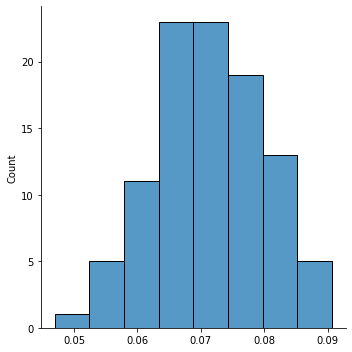

In [9]:
# Import packages
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm

# Create the model
fruit_length_geno = pd.read_table("../data/arabmagic/fruit_length_geno.csv",sep=",",index_col=0)
to_model = pd.DataFrame({"fruit_length":fruit_length_geno['fruit_length'],"height":fruit_length_geno['height']})
to_model = sm.add_constant(to_model)
to_model = to_model.dropna()
X = to_model.loc[:, ['const', 'height']]
y = to_model['fruit_length']
model_height = sm.OLS(y, X).fit()

# Use the model to generate means
locs = model_height.predict(X)
# Use the real data's std dev
std_fruit = y.std()
# Generate 100 random data sets of plants where mean fruit_length follows model_height
slopes = pd.Series(index = [i for i in range(100)], dtype='float64') # Store as a series so we can use .std() later
# For 100 datasets
for i in range(100):
    # Generate the dataset
    dataset = norm.rvs(loc=locs, scale=std_fruit)
    # Generate a new model from the predicted dataset
    model_height_new = sm.OLS(dataset, X).fit()
    # Get the slope of this dataset
    slopes[i] = model_height_new.params[1]

# Create a histogram of the values
sns.displot(data = slopes)
# Get the highest, lowest, and std values
print('Highest:', slopes.max())
print('Lowest:', slopes.min())
print('std:', slopes.std())
# Get the summary of the original model
model_height.summary()